In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential

train=pd.read_csv("engtamilTrain.csv")
train=train.drop(["Unnamed: 0"],axis=1)
english_sentences=train["en"]
tamil_sentence=train['ta']
#restricting it to 1000 for quick computation 
english_sentences=english_sentences.head(1000)
tamil_sentences=tamil_sentence.head(1000)

In [6]:
#!pip install gensim

In [7]:
from gensim.models import Word2Vec
#PCA and pyplot help with visualization 
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [8]:
def sentToken(sentence):
    # define your dataset
    dataset = sentence

    # convert each sentence to a list of words
    sentences = [sentence.split() for sentence in dataset]

    # print the result
    print(sentences)
    
    return sentences


In [9]:
engSentence=sentToken(english_sentences)

[['MMA', 'vice', 'president', 'Qazi', 'Hussain', 'Ahmad', 'declared', 'last', 'month:', "'We", 'are', 'not', 'extremists.'], ['Information', 'has', 'surfaced', 'in', 'recent', 'years', 'suggesting', 'that', 'Julius', 'Rosenberg', 'was', 'involved', 'in', 'passing', 'some', 'form', 'of', 'intelligence', 'to', 'Soviet', 'officials', 'during', 'the', 'Second', 'World', 'War.'], ['And', 'Azor', 'begat', 'Sadoc;', 'and', 'Sadoc', 'begat', 'Achim;', 'and', 'Achim', 'begat', 'Eliud;'], ['She', 'says', 'she', 'knows', 'what', 'is', 'going', 'on,', 'but', 'can', 'do', 'nothing', 'about', 'it.'], ['And', 'be', 'it', 'indeed', 'that', 'I', 'have', 'erred,', 'my', 'error', 'remains', 'with', 'myself.'], ['Finally,', 'the', 'columnist', 'fails', 'to', 'tell', 'us', 'who', 'among', 'the', 'political', 'leaders', 'of', 'the', 'bourgeoisie,', 'past', 'and', 'present,', 'he', 'counts', 'among', 'the', 'paragons', 'of', 'morality.'], ['These', 'include', 'the', 'British', 'Tamil', 'Forum,', 'La', 'Maiso

In [10]:
tamSentence=sentToken(tamil_sentences)

[['MMA', 'கட்சியின்', 'துணைத்தலைவர்', 'க்வாஸி', 'ஹுசேன்', 'அகமத்', 'சென்ற', 'மாதம்', 'பின்வருமாறு', 'அறிவித்தார்:', '``நாங்கள்', 'தீவிரவாதிகள்', 'அல்ல.'], ['சமீபகாலத்தில்', 'சில', 'தகவல்கள்', 'யூலியஸ்', 'ரோசன்பேர்க்', 'ஒரு', 'வித', 'உளவுச்செய்தியை', 'சோவியத்', 'அதிகாரிகளுக்கு', 'இரண்டாம்', 'உலகப்போரின்போது', 'அனுப்பியதில்', 'சம்பந்தப்பட்டு', 'இருந்ததாக', 'வெளிவந்துள்ளன.'], ['ஆசோர்', 'சாதோக்கைப்', 'பெற்றான்;', 'சாதோக்கு', 'ஆகீமைப்', 'பெற்றான்;', 'ஆகீம்', 'எலியூதைப்', 'பெற்றான்;'], ['என்ன', 'நடக்கிறது', 'என்பது', 'தமக்கு', 'தெரியும்', 'என்றும்', 'ஆனால்,', 'தம்மால்', 'எதுவும்', 'செய்யமுடியாது', 'என்றும்', 'கடிதம்', 'எழுதியிருந்தார்.'], ['நான்', 'தப்பிநடந்தது', 'மெய்யானாலும்,', 'என்', 'தப்பிதம்', 'என்னோடேதான்', 'இருக்கிறது'], ['டால்ரிம்பிளினுடைய', 'அறிவுஜீவித்', 'தொடுவானத்திற்கு', 'அப்பால்', 'எவ்வளவோ', 'தொலைவில்', 'இருந்தன'], ['இந்த', 'அமைப்புக்களில்', 'British', 'Tamil', 'Forum,', 'La', 'Maison', 'du', 'Tamil', 'Eelam', '(France),', 'the', 'Canadian', 'Tamil', 'Congress,', 'Swiss',

In [11]:
#read available pretrained models to save on computation limitations
#https://radimrehurek.com/gensim_3.8.3/models/word2vec.html
#https://radimrehurek.com/gensim/models/word2vec.html

In [12]:
#this function takes english sentence and name of model as input, and creates word embeddings using the Word2Vec model, visualizes them using PCA, and saves the model.
def ownWordModel(langsentence,modelname):
    from gensim.models import Word2Vec
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
#word embeddings get created in CBOW as sk in not mentioned; This argument specifies the minimum frequency of a word required to include it in the model    
    model = Word2Vec(langsentence, min_count=1)
    print(model)
    # save model
    model.save(modelname)
    # fit a 2d PCA model to the vectors
    X = model.wv.vectors  # X stores the word vectors (embeddings) created by the Word2Vec mode
    #PCA is unsupervised algorithm so you can view the clustering output - reduce the word embeddings from high-dimensional space to 2D for visualization.
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)

    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    words = list(model.wv.index_to_key)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.show()


Word2Vec<vocab=7300, vector_size=100, alpha=0.025>


C:\Anaconda3\envs\aiml\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\aiml\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\envs\aiml\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\aiml\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\aiml\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\envs\aiml\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text

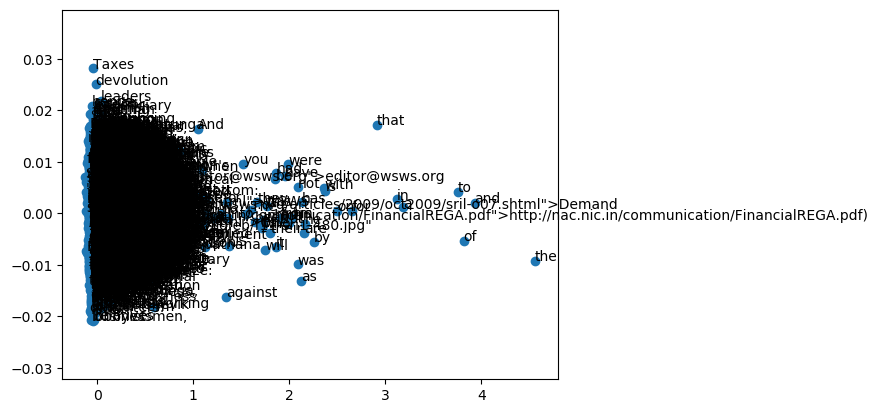

In [20]:
ownWordModel(engSentence,"engmodel.bin")

Word2Vec<vocab=9882, vector_size=100, alpha=0.025>


C:\Anaconda\envs\aiml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2962 (\N{TAMIL LETTER O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda\envs\aiml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Tamil natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda\envs\aiml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2992 (\N{TAMIL LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda\envs\aiml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3009 (\N{TAMIL VOWEL SIGN U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda\envs\aiml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2990 (\N{TAMIL LETTER MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Anaconda\envs\aiml\Lib\site-packages\I

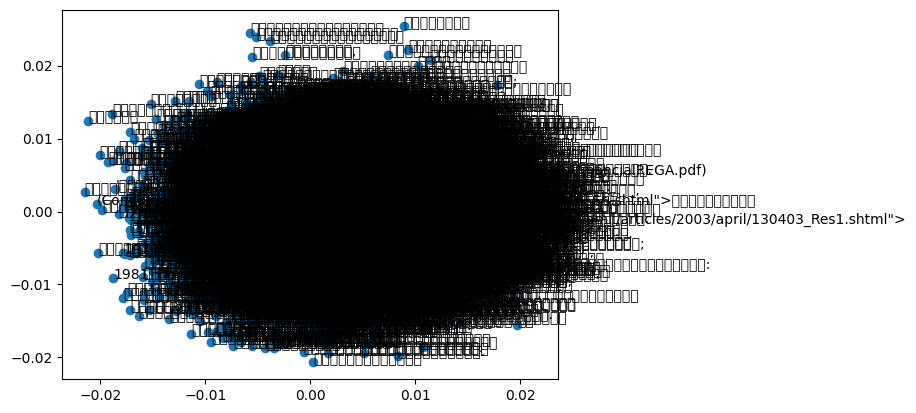

In [13]:
ownWordModel(tamSentence,"tammodel.bin")